# Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# Importing Dataframe

In [4]:
df = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv',index_col = False)

/var/folders/gv/sm1b476s1zz2r143g9h9qgj40000gq/T/ipykernel_77569/96195919.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv',index_col = False)


In [5]:
death_cases_gender = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv',index_col = False)

/var/folders/gv/sm1b476s1zz2r143g9h9qgj40000gq/T/ipykernel_77569/3866303451.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  death_cases_gender = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv',index_col = False)


In [9]:
df.head()

,Unnamed: 0,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region
0,0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South
1,1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South
2,2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South
3,3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South
4,4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South


In [24]:
death_cases_gender.drop(columns = ['county','state','region'])


,Unnamed: 0,county_code,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage
0,0,1001.0,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217
1,1,1001.0,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217
2,2,1001.0,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217
3,3,1001.0,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217
4,4,1001.0,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480815,3480815,56045.0,43.839612,-104.567488,2022-12-29,1880,WY,22,3768,3332,42.9,7100,46.929577
3480816,3480816,56045.0,43.839612,-104.567488,2022-12-30,1880,WY,22,3768,3332,42.9,7100,46.929577
3480817,3480817,56045.0,43.839612,-104.567488,2022-12-31,1880,WY,22,3768,3332,42.9,7100,46.929577
3480818,3480818,56045.0,43.839612,-104.567488,2023-01-22,1884,WY,22,3768,3332,42.9,7100,46.929577


In [33]:
death_cases_gender_2 = death_cases_gender.drop(columns = ['county','state','region','date','state_code'])

In [34]:
death_cases_gender_2.shape

(3480820, 11)

In [35]:
df = death_cases_gender_2

## The elbow technique

In [39]:
num_cl = range(1, 16) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [51]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/sandeepti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sandeepti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sandeepti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sandeepti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

[-4.0833224385313485e+18,
 -1.446594055417854e+18,
 -9.57515628044553e+17,
 -6.986815094654798e+17,
 -5.2717436242469875e+17,
 -4.3055899109851046e+17,
 -3.5086039926709914e+17,
 -3.033950812852527e+17,
 -2.5841858378995414e+17,
 -2.171626070911531e+17,
 -1.903839266308185e+17,
 -1.722590485356414e+17,
 -1.570043376550233e+17,
 -1.4208212997787955e+17,
 -1.2732664941944224e+17]

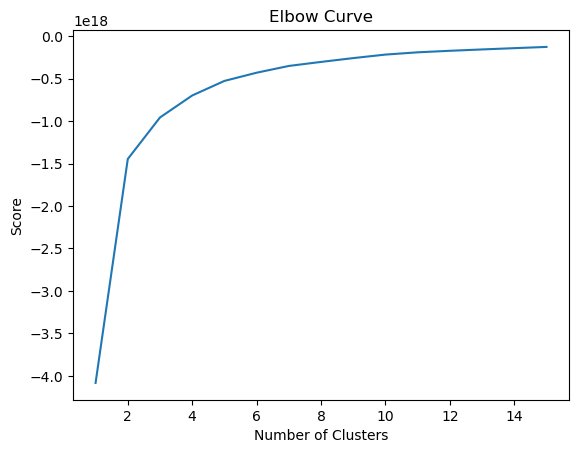

In [41]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## k-means clustering

In [53]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 6) 

In [54]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/sandeepti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [55]:
df['clusters'] = kmeans.fit_predict(df)

/Users/sandeepti/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
df.head()

,Unnamed: 0,county_code,lat,long,cases,deaths,male,female,median_age,population,female_percentage,clusters
0,0,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217,1
1,1,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217,1
2,2,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217,1
3,3,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217,1
4,4,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217,1


In [57]:
df['clusters'].value_counts()

clusters
4    873414
1    860560
0    852909
2    847807
5     41806
3      4324
Name: count, dtype: int64

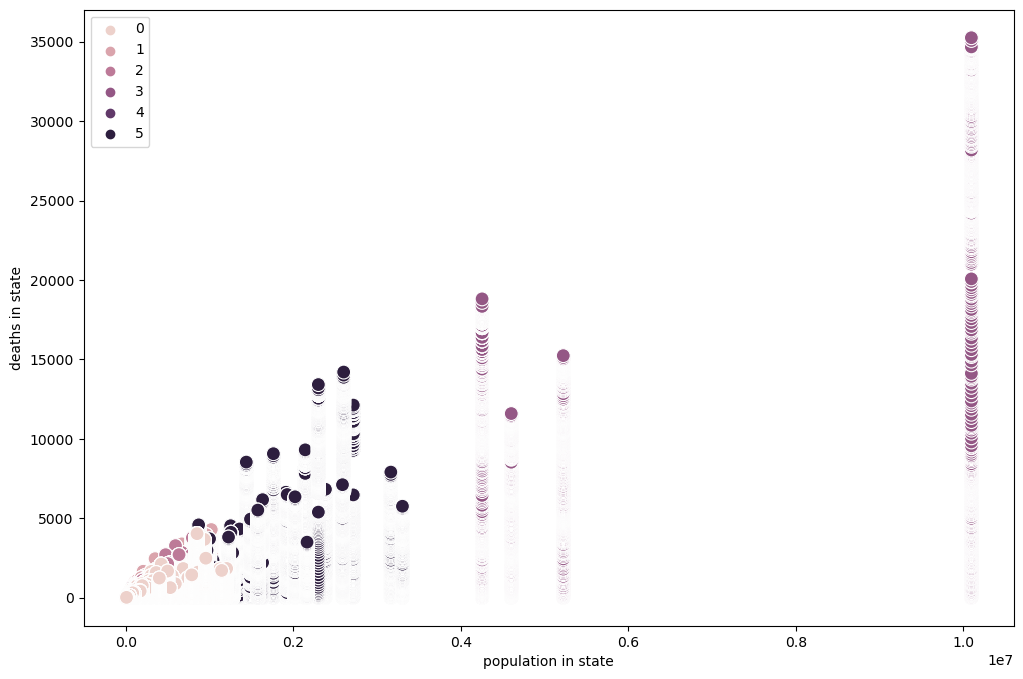

In [58]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['population'], y=df['deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('population in state') # Label x-axis.
plt.ylabel('deaths in state') # Label y-axis.
plt.show()

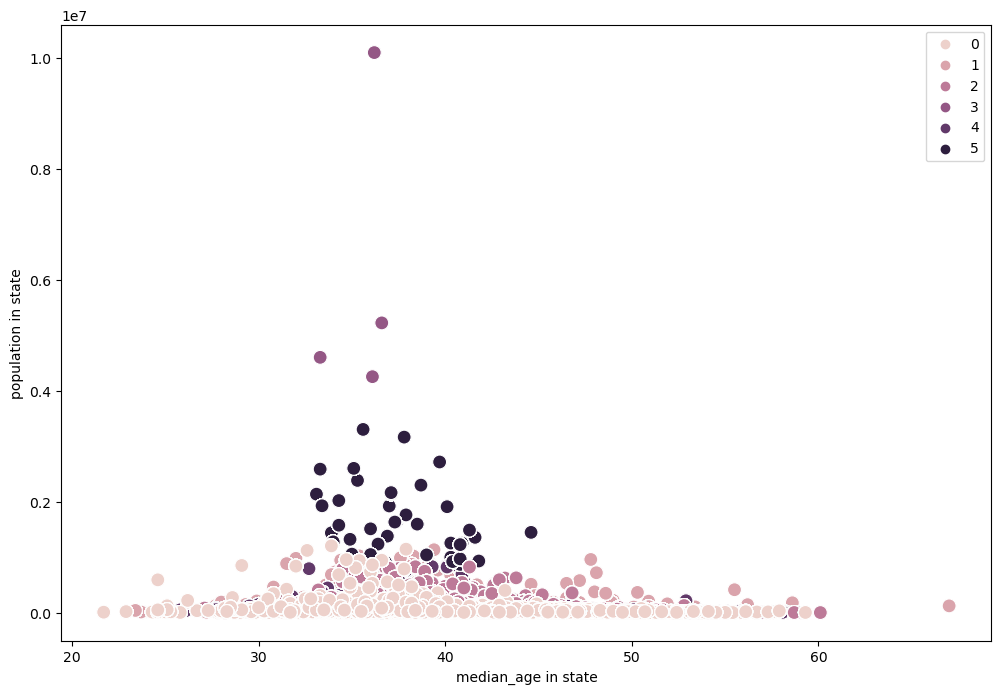

In [62]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['median_age'], y=df['population'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('median_age in state') 
plt.ylabel('population in state') 
plt.show()

In [60]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [63]:
df.groupby('cluster').agg({'deaths':['mean', 'median'], 
                         'median_age':['mean', 'median'], 
                         'population':['mean', 'median']})

deaths        median_age           population         
                   mean median       mean median          mean   median
cluster                                                                
dark purple  148.525551   26.0  42.109564   41.8  84461.822070  37665.0
pink         106.059889   32.0  40.956527   41.4  64422.759189  22717.0
purple       166.101687   49.0  40.919964   40.7  94275.909827  26294.0